## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#print(len(mouse_metadata))
#print(mouse_metadata.head())

print(len(study_results))
study_results.head()

1893


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [2]:
# Checking the number of mice in the DataFrame.
print(len(mouse_metadata))
mouse_metadata.head()

# print(len(mouse_metadata['Mouse ID'].unique()))

249


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
mouse_metadata.duplicated(['Mouse ID', 'Drug Regimen']).sum()

0

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_series = study_results.duplicated(['Mouse ID', 'Timepoint'])

# filter for boolean = True to find duplicates
study_results['Duplicate'] = duplicate_series


study_results.loc[duplicate_series,:]
# never compare a list of items against a scalar value -- you have to use a for loop
# index as a boolean will run through and check for all the True values (those which satisfy the boolean condition)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
137,g989,0,45.000000,0,True
360,g989,5,47.570392,0,True
681,g989,10,49.880528,0,True
869,g989,15,53.442020,0,True
1111,g989,20,54.657650,1,True


In [5]:
# duplicates - driven by primary key (Mouse ID)
# questions - what to do with the duplicate mice? which record to keep?
# look for python function to drop duplicates
unique_mice = study_results.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first', inplace=False)

In [6]:
unique_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
0,b128,0,45.0,0,False
1,f932,0,45.0,0,False
2,g107,0,45.0,0,False
3,a457,0,45.0,0,False
4,c819,0,45.0,0,False


In [7]:
# merge unique mice with mouse metadata
merged_mice = pd.merge(unique_mice, mouse_metadata, on = 'Mouse ID')

In [8]:
merged_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,False,Capomulin,Female,9,22
1,b128,5,45.651331,0,False,Capomulin,Female,9,22
2,b128,10,43.270852,0,False,Capomulin,Female,9,22
3,b128,15,43.784893,0,False,Capomulin,Female,9,22
4,b128,20,42.731552,0,False,Capomulin,Female,9,22


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the TUMOR VOLUME for EACH REGIMEN

# This method is the most straighforward, creating multiple series 
# and putting them all together at the end.

# measures of central tendency
merged_mice.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,19.597458,50.449276,1.023835,12.792903,25.661547
std,14.084762,8.904565,1.138507,7.186737,3.926776
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951421,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [10]:
# made this for the standard deviation calculations
mergedmice_volume = merged_mice.drop(columns=['Duplicate', 'Sex'])

mice_mean = merged_mice.groupby(['Drug Regimen']).mean()
mice_median = merged_mice.groupby(['Drug Regimen']).median()
mice_variance = merged_mice.groupby(['Drug Regimen']).var()
mice_stddev = mergedmice_volume.groupby(['Drug Regimen']).std()
mice_sem = mergedmice_volume.groupby(['Drug Regimen']).sem()


In [11]:
mean_series = mice_mean['Tumor Volume (mm3)']
median_series = mice_median['Tumor Volume (mm3)']
variance_series = mice_variance['Tumor Volume (mm3)']
std_series = mice_stddev['Tumor Volume (mm3)']
sem_series = mice_sem['Tumor Volume (mm3)']

# mice_median.head()

In [12]:
frames = [mean_series, median_series, variance_series, std_series, sem_series]
summary_stats = pd.concat(frames, axis=1, keys = ['Mean Volume', 'Median Volume', 'Variance', 'Standard Dev', 'SEM'])
summary_stats


,Mean Volume,Median Volume,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [13]:
# Generate a bar plot showing 
# the number of mice per time point for each treatment 
# throughout the course of the study using pandas. 

# First: create the series of timepoint counts for each regimen
capo_time = merged_mice.loc[merged_mice['Drug Regimen'] == 'Capomulin'].groupby(['Timepoint']).count()['Mouse ID']
ceft_time = merged_mice.loc[merged_mice['Drug Regimen'] == 'Ceftamin'].groupby(['Timepoint']).count()['Mouse ID']
infubinol_time = merged_mice.loc[merged_mice['Drug Regimen'] == 'Infubinol'].groupby(['Timepoint']).count()['Mouse ID']
keta_time = merged_mice.loc[merged_mice['Drug Regimen'] == 'Ketapril'].groupby(['Timepoint']).count()['Mouse ID']
naftisol_time = merged_mice.loc[merged_mice['Drug Regimen'] == 'Naftisol'].groupby(['Timepoint']).count()['Mouse ID']
placebo_time = merged_mice.loc[merged_mice['Drug Regimen'] == 'Placebo'].groupby(['Timepoint']).count()['Mouse ID']
propriva_time = merged_mice.loc[merged_mice['Drug Regimen'] == 'Propriva'].groupby(['Timepoint']).count()['Mouse ID']
ramicane_time = merged_mice.loc[merged_mice['Drug Regimen'] == 'Ramicane'].groupby(['Timepoint']).count()['Mouse ID']
stela_time = merged_mice.loc[merged_mice['Drug Regimen'] == 'Stelasyn'].groupby(['Timepoint']).count()['Mouse ID']
zoni_time = merged_mice.loc[merged_mice['Drug Regimen'] == 'Zoniferol'].groupby(['Timepoint']).count()['Mouse ID']


In [14]:
times = [capo_time, ceft_time, infubinol_time, keta_time, naftisol_time, placebo_time, 
        propriva_time, ramicane_time, stela_time, zoni_time]


In [15]:
merged_mice['Drug Regimen'].unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'],
      dtype=object)

In [16]:
# combine the series all into one dataframe
mice_time = pd.concat(times, axis=1, keys=['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'])

In [17]:
mice_time

,Capomulin,Ketapril,Naftisol,Infubinol,Stelasyn,Ramicane,Propriva,Zoniferol,Placebo,Ceftamin
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,24,25
5,25,21,25,23,23,24,24,25,23,24
10,25,20,21,22,21,24,22,24,21,22
15,24,19,21,19,21,20,16,24,21,21
20,23,18,20,19,20,19,16,23,19,17
25,22,18,18,19,18,17,14,23,18,16
30,22,16,17,18,15,15,13,23,17,15
35,22,14,12,17,15,14,10,21,15,14
40,21,14,10,15,15,12,9,20,12,14


In [18]:
# merged_mice.groupby('Timepoint').count()


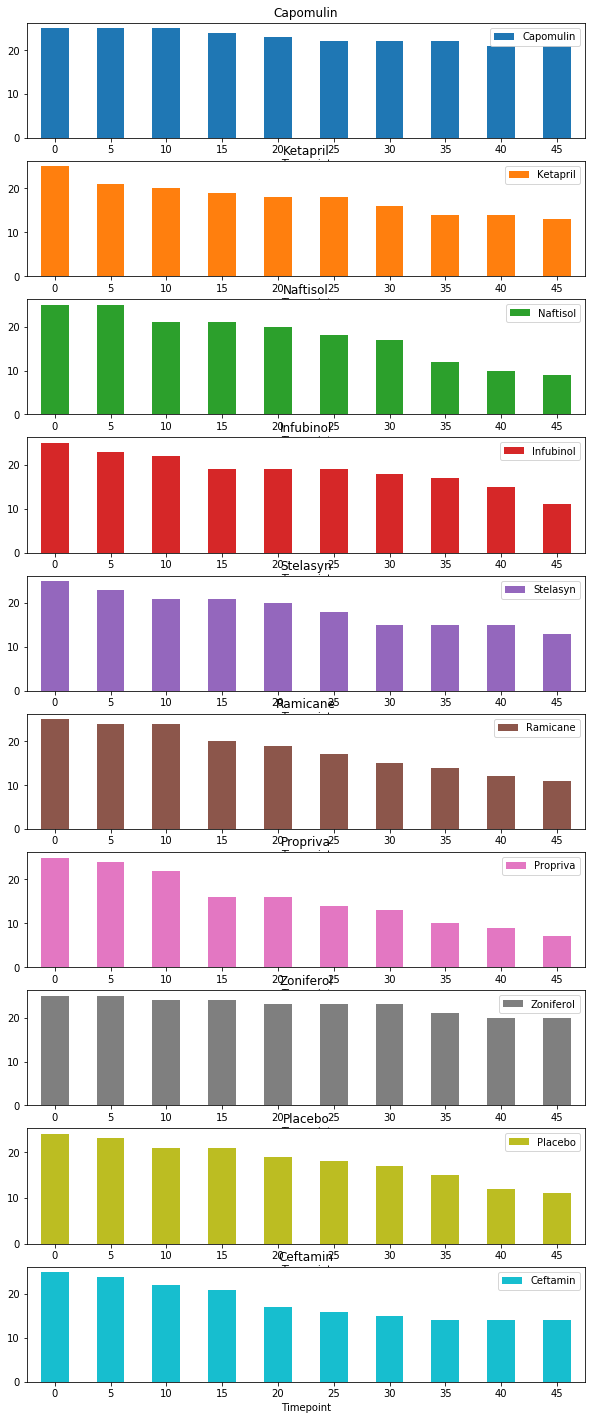

In [19]:
# Generate a bar plot using both Pandas's DataFrame.plot()

mice_time.plot.bar(figsize=(10,25), rot=0, subplots=True, sharex=False)
plt.show()

# and Matplotlib's pyplot that shows the number of mice per time point
# for each treatment regimen throughout the course of the study.


<BarContainer object of 10 artists>

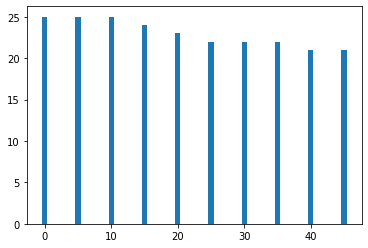

In [20]:
timepoint = np.arange(0,50,5)
plt.bar(timepoint, capo_time, align="center")

# at the very least you can just do this over and over, change the width, height, etc.

In [ ]:
# Generate a bar plot showing the number of mice 
# per time point for each treatment throughout the course of the study using pyplot.

times = [capo_time, ceft_time, infubinol_time, keta_time, naftisol_time, placebo_time, 
        propriva_time, ramicane_time, stela_time, zoni_time]

treatment = ['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin']


# for y in plt.bar(timepoint, y):
    

# plt.subplots(sharex=False, sharey=False

# data = mice_time
# fig, axes = plt.subplots(nrows=10, ncols=1)
# fig.subplots_adjust(hspace=0.5)
# fig.suptitle('# of Mice per Treatment / Timepoint')

# for time in times:
#     plt.bar(timepoint, time)

## Pie Plots

Male      125
Female    124
Name: Sex, dtype: int64


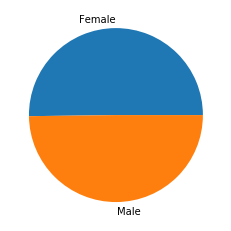

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Labels for sections of Pie Chart
labels = ["Female", "Male"]

# Values of each section of pie chart

female = mouse_metadata['Sex'] == 'Female' # you need to add something here that only counts unique mice ID
# male = len(mouse_metadata['Sex'] == 'Male') # probably should drop the len function and use a value counts

counts = mouse_metadata['Sex'].value_counts()
print(counts)

# pie chart
plt.pie(counts, labels=labels)
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Capomulin
# Ramicane
# Infubinol
# Ceftamin
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# final tumor volume means timepoint = 45 days
# set the boxplot axis to volume = []
merged_mice.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,False,Capomulin,Female,9,22
1,b128,5,45.651331,0,False,Capomulin,Female,9,22
2,b128,10,43.270852,0,False,Capomulin,Female,9,22
3,b128,15,43.784893,0,False,Capomulin,Female,9,22
4,b128,20,42.731552,0,False,Capomulin,Female,9,22
5,b128,25,43.262145,1,False,Capomulin,Female,9,22
6,b128,30,40.605335,1,False,Capomulin,Female,9,22
7,b128,35,37.967644,1,False,Capomulin,Female,9,22
8,b128,40,38.379726,2,False,Capomulin,Female,9,22
9,b128,45,38.982878,2,False,Capomulin,Female,9,22


In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

merged_mice.head()
    

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,False,Capomulin,Female,9,22
1,b128,5,45.651331,0,False,Capomulin,Female,9,22
2,b128,10,43.270852,0,False,Capomulin,Female,9,22
3,b128,15,43.784893,0,False,Capomulin,Female,9,22
4,b128,20,42.731552,0,False,Capomulin,Female,9,22


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin



In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
